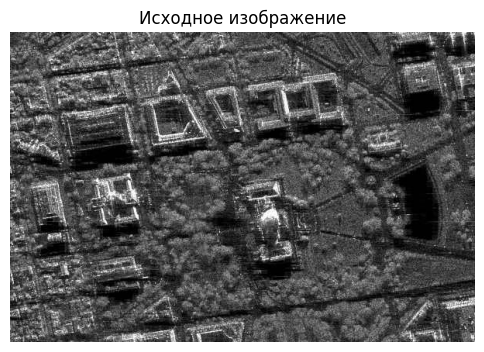

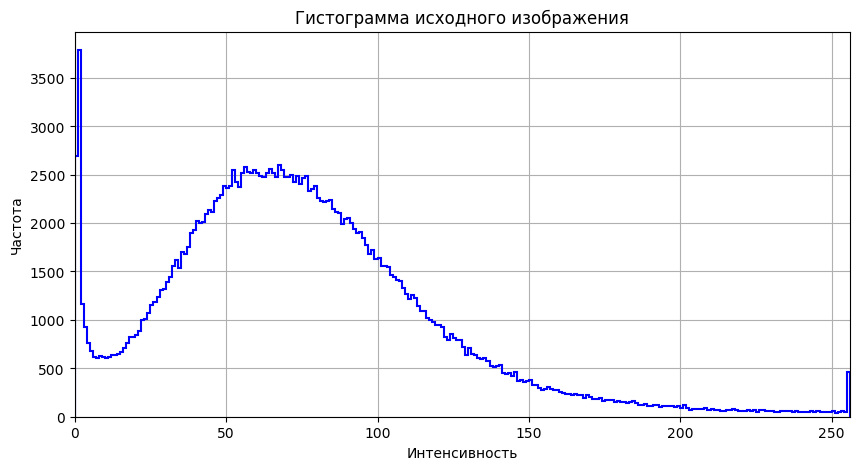

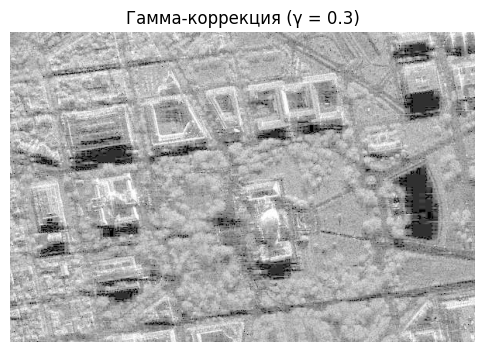

Гамма = 0.3 | MSE = 8929.83, SSIM = 0.6219


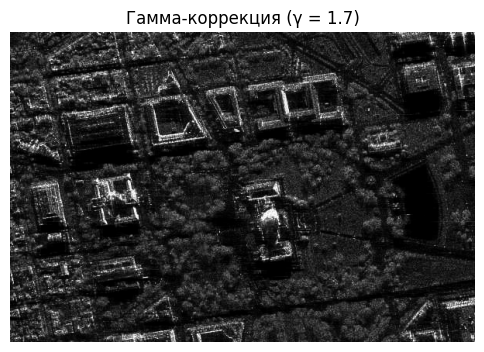

Гамма = 1.7 | MSE = 1552.03, SSIM = 0.6885


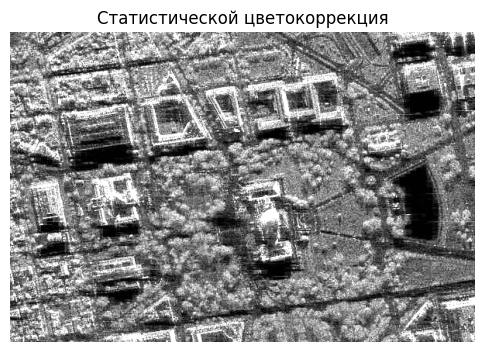

Статистическая цветокоррекция | MSE = 2946.70, SSIM = 0.7862


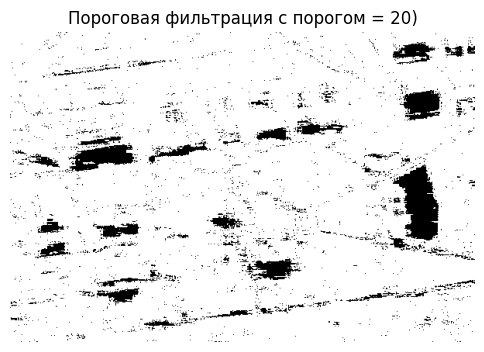

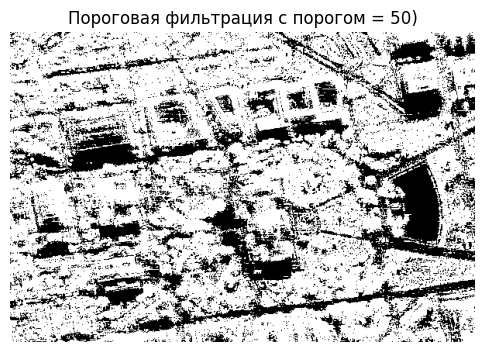

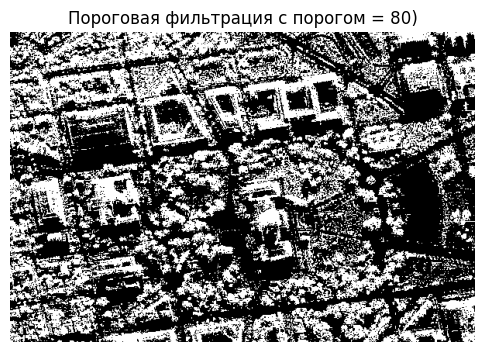

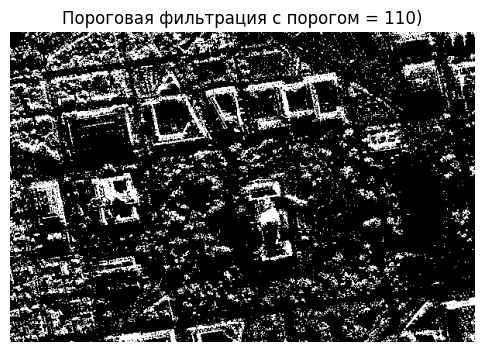

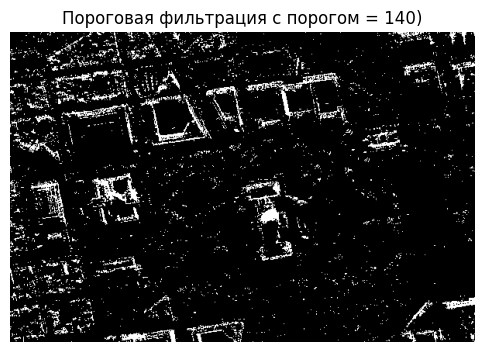

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def gamma_correction(image, gamma):
    """
    Применяет гамма-коррекцию к изображению.
    """
    normalized_image = image / 255.0
    corrected_image = np.power(normalized_image, gamma)
    corrected_image = np.uint8(corrected_image * 255)
    return corrected_image

def calculate_quality_metrics(original, processed):
    """
    Вычисляет метрики качества изображения: MSE и SSIM.
    """
    mse = np.mean((original.astype("float") - processed.astype("float")) ** 2)
    ssim_value = ssim(original, processed, multichannel=False)
    return mse, ssim_value

def statistical_color_correction(image, reference):
    """
    Статистическая цветокоррекция на основе статистики reference изображения.
    """
    # Нормализация изображения на основе статистики reference
    mean_ref = np.mean(reference)
    std_ref = np.std(reference)
    mean_img = np.mean(image)
    std_img = np.std(image)

    corrected_image = (image - mean_img) / std_img * std_ref + mean_ref
    corrected_image = np.uint8(np.clip(corrected_image, 0, 255))
    return corrected_image

def apply_threshold(image, threshold):
    """
    Применяет пороговую обработку к изображению.
    """
    _, thresholded_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return thresholded_image

# 1. Загрузка изображения в оттенках серого
image_path = 'sar_1_gray.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    print("Ошибка: файл изображения не найден или путь указан неверно.")
else:
    # Вывод исходного изображения
    plt.figure(figsize=(6, 6))
    plt.imshow(original_image, cmap='gray')
    plt.title('Исходное изображение')
    plt.axis('off')
    plt.show()

    # 2. Построение гистограммы исходного изображения
    plt.figure(figsize=(10, 5))
    plt.hist(original_image.ravel(), bins=256, range=[0, 256], color='blue', histtype='step', linewidth=1.5)
    plt.title('Гистограмма исходного изображения')
    plt.xlabel('Интенсивность')
    plt.ylabel('Частота')
    plt.xlim([0, 256])
    plt.grid()
    plt.show()

    # 3. Гамма-коррекция
    gamma_values = [0.3, 1.7]  # Пример значений гаммы: <1 и >1
    for gamma in gamma_values:
        gamma_corrected = gamma_correction(original_image, gamma)

        plt.figure(figsize=(6, 6))
        plt.imshow(gamma_corrected, cmap='gray')
        plt.title(f'Гамма-коррекция (γ = {gamma})')
        plt.axis('off')
        plt.show()

        # 4. Сравнение с исходным изображением
        mse, ssim_value = calculate_quality_metrics(original_image, gamma_corrected)
        print(f'Гамма = {gamma} | MSE = {mse:.2f}, SSIM = {ssim_value:.4f}')

    # 5. Статистическая цветокоррекция на основе статистики eq_gray
    # Создаем эталонное изображение (eq_gray) с помощью выравнивания гистограммы
    eq_gray = cv2.equalizeHist(original_image)

    # Применяем статистическую цветокоррекцию
    stat_corrected = statistical_color_correction(original_image, eq_gray)

    plt.figure(figsize=(6, 6))
    plt.imshow(stat_corrected, cmap='gray')
    plt.title('Статистической цветокоррекция')
    plt.axis('off')
    plt.show()

    # Оценка качества после статистической цветокоррекции
    mse_stat, ssim_stat = calculate_quality_metrics(original_image, stat_corrected)
    print(f'Статистическая цветокоррекция | MSE = {mse_stat:.2f}, SSIM = {ssim_stat:.4f}')

    # 6. Пороговая фильтрация
    threshold_values = [20, 50, 80, 110, 140]  # Пример пороговых значений
    for threshold in threshold_values:
        thresholded_image = apply_threshold(original_image, threshold)

        plt.figure(figsize=(6, 6))
        plt.imshow(thresholded_image, cmap='gray')
        plt.title(f'Пороговая фильтрация с порогом = {threshold})')
        plt.axis('off')
        plt.show()